<a href="https://colab.research.google.com/github/FaisalUllahKhan/IIOT/blob/master/Education_Module_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Networking for IIOT

### Contents:
- [Overview](#Overview)
  - [In a nutshell](#In-a-nutshell)
- [IIOT End Devices](#IIOT-End-Devices)
    - [Introduction to some protocols](#Introduction-to-some-protocols)
    - [Sensors](#Sensors)
- [IIOT Gateways](#IIOT-Gateways)
    - [Services running on Raspberry](#Services-running-on-Raspberry)
    - [Setting up the pi](#Setting-up-the-Pi)
        - [OS](#OS)
        - [Username and password](#Username-and-password)
        - [Mosquitto broker](#Mosquitto-broker)
        - [Setting up Internet Connectivity](#Setting-up-Internet-Connectivity)
- [IIOT Middleware](#IIOT-Middleware)
    - [Setting up Elasticsearch](#Setting-up-Elasticsearch)
    - [HTTP get and post functionalities](#HTTP-get-and-post-functionalities)
    - [Setting up Kibana](#Setting-up-Kibana)
    - [Kibana Aggregations](#Kibana-Aggregations)

## Overview
***
### In a nutshell
***
We have given a general structure of the IIOT network implementation in this section. We would like to layout the resources, methadology and the step by step instructions that would give you an overview of what we will be doing in this module. Also you might come across terms that you might not have heard or you may not be having the working knowledge of those things, either way, as this module progresses you will get acquainted with all of the terms as we have given a decent description of the topics and explained in a stepwise manner.

**Resources:**
1. Raspberry pi zero W
2. Sensors (vibration, proximity, energy meter, temperature sensor)
3. If sensors are not available we can use a [fakesensor](https://github.com/FaisalUllahKhan/IIOT/blob/master/fakesensor.py)
4. For illustration purposes we have provided a sample code too, that generates a sine wave.
5. A laptop or a pc to work as a server.

We can use only the local machine if the server is not avaliable.

Once we have all these resources we can get started with our setup. We have to connect the various sensors to the machines. The raspberry pis need to be configured and we need to install Raspbian OS on them. We will be using the mosquitto MQTT broker to transmit data. Then on the server we need to install elasticsearch and kibana and make them avaliable remotely. If we are only using a local machine then kibana and elasticsearch will be installed on the local machine and the analysis will have to be done on the local machine itself. The limitation of this setup is that in this setup everything will have to be connected locally.
Then from our local machine we can see the data on the server being published by the sensors via the Pi's. Using kibana we can visualize the data. Then we can collect the data acquired and make it into a csv file on which we can run algorithms for various analysis like state detections, energy consumptions, average working time of individual machines, anomaly detections etc.
***
In this section we will give a brief overview of the functional layers in IIOT network implementation.
***
### Functional Layers in IIOT Network implementation
***
> 1. IIOT End Devices - IED
> 2. IIOT Gateways - IGW
> 3. IIOT Middleware - IMW
> 4. IIOT Cloud Server - ICS

#### IIOT END DEVICES(IED)
***
- The IoT end-devices or IEDs contain the sensors (or actuators) and are closest to the end node being monitored. They gather data periodically by reading the sensors attached to them and relay them to the IOT Gateway over a suitable protocol/channel like MODBUS, BLE, or directly over the GPIO pins depending on the type of sensor
- Different type of sensors connect differently to the Gateways, like we can connect:
    - Vibration sensor over Bluetooth(BLE)
    - Energy Meter over MODBUS
    - Proximity Sensor over GPIOS of RpiZ
    - Thermocouple Temperature Sensor over I2C
    
#### IIOT GATEWAYS(IGW)
***
- The gateways are devices which are next up in the hierarchy of the network.
- The gateways provide the following services:
    1. **Reliable Connectivity:** between the IIOT Server and the IIOT End Devices. The IGW may buffer the incoming data from various IEDs incase the upstream connection to the IMW is broken and try to push the data once the IMW is reachable again.
    2. **Protocol and data bridge:** makes possible the interoperation of IEDs using different protocols and data formats - i.e. a Sensor might be sending reading of LDR analog values using plain text over UART Serial and the IGW can translate the same to a JSON message which might be then sent to the IMW. Similarly an Energy meter might be using a protocol like MODBUS to convey the sensor readings and the IGW will translate the MODBUS formatted datapacket into a JSON message to be sent to the IMW. Similarly JSON commands sent to IEDs containing actuators may be converted to the proper data format and protocol by the IGW before forwarded to the IED.
    3. **Management:** The gateway can automatically detect and add new IEDs added to the network or remove faulty IEDs from the network intelligently. In this way the IEDs can be managed via the IGW.
    4. **Storage and Analysis:** In certain cases, the IGW can itself act as a data store and can also perform lightweight analysis on the incomming data and push only the very relevant information to the IMW and filtering out the rest. Also the IGW can take certain actions like commanding an actuator based on the analysis of the incoming sensor data and hence the closed loop time to take critical actions can be reduced.
 
#### IIOT MIDDLEWARE(IMW)
***
- Next up in the network is the IIOT Middleware which provides the following services in general (which may vary slightly between implementations:
    - **Persistent data storage**
    - **Analysis on the data**
    
####  IIOT Cloud Server (ICS)
- The final layer in the network is the cloud server.
- This server has a public IPv4 and/or IPv6 address and is reachable from anywhere on the internet.
- The cloud server can be used for -
    - permanent data store
    - online/offline analysis
    - realtime visualisation of the raw/processed data
    - VPN access to the Middleware and the local network in the remote factory floor

#### OVERVIEW DIAGRAM
***
![IOTGW-OVERVIEW.png](https://raw.githubusercontent.com/FaisalUllahKhan/IIOT/master/EM%20images/Overview%20Image%202%20.png)
***

## IIOT End Devices
***
This section provides a very basic introduction to the protocols that we use to communicate between the sensor and the IGW. It also mentions some of the commonly used sensors. 
***
![IOTGW-OVERVIEW-HIGHLIGHT-IED.png](https://raw.githubusercontent.com/FaisalUllahKhan/IIOT/master/EM%20images/IOTGW-OVERVIEW-HIGHLIGHT-IED.png)

- The end devices are those devices that take data from the machines directly or indirectly and send that data via a network to a centralized server, to make evaluations and optimizations based on that data.
- The sensors are the end devices in our implementations
- As already mentioned in the overview we can use different methods for interacting the sensors with the IGW like:
    - Vibration sensor over BLE
    - Energy Meter over MODBUS
    - Proximity sensor over GPIOs of RPiZ
    - Thermocouple Temperature Sensor over I2C

### Introduction to some protocols
***
**Bluetooth Low Energy(BLE)**
- Not actually a protocol
- is a wireless personal area network technology
- Compared to Classic Bluetooth, Bluetooth Low Energy is intended to provide considerably reduced power consumption and cost while maintaining a similar communication range. 
- Bluetooth Low Energy uses the same 2.4 GHz radio frequencies as classic Bluetooth.
- It offers very low power consumption and hence battery life can be very long. 
- It can not be used for higher data rates as offered by wifi and cellular technologies.
- It can be used to connect upto 10 devices simultaneously.
- For more details [click here](https://en.wikipedia.org/wiki/Bluetooth_Low_Energy)

**MODBUS**
- Modbus is a communication protocol developed by Modicon systems. In simple terms, it is a method used for transmitting information over serial lines between electronic devices. The device requesting the information is called the Modbus Master and the devices supplying information are Modbus Slaves
- For more details [click here](https://en.wikipedia.org/wiki/Modbus)

**I2C**
- I2C is a serial communication protocol, so data is transferred bit by bit along a single wire (the SDA line). Like SPI, I2C is synchronous, so the output of bits is synchronized to the sampling of bits by a clock signal shared between the master and the slave. The clock signal is always controlled by the master.
- For more details [click here](http://www.circuitbasics.com/basics-of-the-i2c-communication-protocol/)

### Sensors
***

**Vibration Sensor**

- As mentioned above we usually connect the vibration sensor to our IGW ie RPiZ using BLE
- The vibration sensor is also called a piezoelectric sensor. These sensors are flexible devices which are used for measuring various processes. This sensor uses the piezoelectric effects while measuring the changes within acceleration, pressure, temperature, force otherwise strain by changing to an electrical charge. 
![Vibration%20Sensor.jpg](https://raw.githubusercontent.com/FaisalUllahKhan/IIOT/master/EM%20images/Vibration%20Sensor.jpg)

**Proximity Sensor**

- A proximity sensor is a sensor able to detect the presence of nearby objects without any physical contact. A proximity sensor often emits an electromagnetic field or a beam of electromagnetic radiation (infrared, for instance), and looks for changes in the field or return signal.
![Proximity%20sensor.jpg](https://raw.githubusercontent.com/FaisalUllahKhan/IIOT/master/EM%20images/Proximity%20sensor.jpg)

**Energy Meter**

- Energy Meter Definition: The meter which is used for measuring the energy utilises by the electric load is known as the energy meter. The energy is the total power consumed and utilised by the load at a particular interval of time. It is used in domestic and industrial AC circuit for measuring the power consumption.
![Energy%20Meter1.png](https://raw.githubusercontent.com/FaisalUllahKhan/IIOT/master/EM%20images/Energy%20Meter1.png)

**Temperature Sensor**

- Temperature sensor is a device, to measure the temperature through an electrical signal it requires a thermocouple or RTD (Resistance Temperature Detectors). The thermocouple is prepared by two dissimilar metals which generate the electrical voltage indirectly proportional to change the temperature. The RTD is a VARIABLE RESISTENCE , it will change the electrical resistance indirectly proportional to changes in the temperature in a precise, and nearly linear manner.

![Temp%20Sensor.jpg](https://raw.githubusercontent.com/FaisalUllahKhan/IIOT/master/EM%20images/Temp%20Sensor.jpg)

***

## IIOT Gateways
***
In this section we will be explaining how we are going to set up the Raspberry pi and what are the services that we will be using on the pi. We will guide you through the setting up of the pi, which will include the OS installation, changing the username and the password, setting up the mosquitto service on the pi and then finally we will provide a publishing MQTT python script that we will run on the pi. There are some exercies for the reader to get a better understanding of the protocol being used.
***
![IOTGW-OVERVIEW-HIGHLIGHT-GW.png](https://raw.githubusercontent.com/FaisalUllahKhan/IIOT/master/EM%20images/IOTGW-OVERVIEW-HIGHLIGHT-GW.png)
***
- The IIOT gateway in our implementation is a Raspberry Pi-zero-W which is a small Single Board Computer (SBC).
- The RPiZw runs a Debian OS(Raspbian) which is similar to the Ubuntu/Linux OS we use in our desktop.
- Many softwares are run on the RPiZw which enable the RPiZw to provide the necessary services needed to be present on a IIOT Gateway.
- To read more about the pi [click here](https://www.raspberrypi.org/documentation/)

### Services running on Raspberry
***
1. IIOT End Device Driver (IED Driver)
2. Mosquitto MQTT Broker
3. MQTT to IIOT Middleware Publish Service.

**The diagram below shows the microservices running on the Raspberry Pi**
***
![IOTGW-DETAILS.jpg](https://raw.githubusercontent.com/FaisalUllahKhan/IIOT/master/EM%20images/IOTGW-DETAILS.jpg)

### Setting up the Pi
***
### OS
***
- We need to install the Raspbian OS or NOOBS on the pi which is very similar to the Linux distributions
- For our purposes we will use the Raspbian OS
- You can download it from [here](https://www.raspberrypi.org/downloads/raspbian/)
***
![Raspbian.png](https://raw.githubusercontent.com/FaisalUllahKhan/IIOT/master/EM%20images/Raspbian.png)
***
- After the ISO image has been downloaded on our Pc we need to burn the image on a memory card(16GB) to be used in the Pi
- You can use [Win32 disk imager](https://sourceforge.net/projects/win32diskimager/) to burn the image if you are on a windows machine.
- Or you can use balenaEtcher [balenaEtcher](https://www.balena.io/etcher/) which comes for linux, windows as well as for Mac OS.
- After you have downloaded this software run the software and we will see a select image option, after selecting the image we need to select our SD card on which we have to flash this image. If you have inserted the SD card beforehand then it will automatically detect the SD card. We just have to click flash and it's done. Simple!
- We can also include the drivers on the image before burning it to an SD card, so that our end devices can interact with our Pi
***
### Username and password
***
- By default the username of the pi is 'pi' and the password is 'raspberry'.
- So the first thing we might want to do is to change these defaults for security reasons.
- After connecting our pi to a monitor and other peripherals we can easily change the username and password and also create additional users if necessary.

- In order to change the username 'pi' we will have to log in a the root user since it's not possible to rename an account while your logged into it. To log in as root user first we have to enable it, to do so type the following command whilst logged in as the default pi user:

>``` sudo passwd root```

- Choose a secure password for the root user. You can disable the root account later if you wish.

- Now logout of the user pi using the command:

> `logout`

- And then logout back in as the user 'root' using the password you just created. Now we can rename the the default pi user name. The following method renames the user 'pi' to 'newname', replace this with whatever you want. Type the command:

> `usermod -l newname pi`

- Now the user name has been changed the user's home directory name should also be changed to 
reflect the new login name:

> `usermod -m -d /home/newname newname`

- Now logout and login back in as newname. You can change the default password from raspberry to something more secure by typing following command and entering a new password when prompted:

> `passwd`

- If you wish you can disable the root user account again but first double check newname still has 'sudo' privileges. Check the following update command works:

> `sudo apt-get update`

- If it works then you can disable the root account by locking the password:

> `sudo passwd -l root`
***
### Mosquitto broker
***
![IOTGW-DETAILS-HIGHLIGHT-MQTTBROKER.png](https://raw.githubusercontent.com/FaisalUllahKhan/IIOT/master/EM%20images/IOTGW-DETAILS-HIGHLIGHT-MQTTBROKER.png)
***
- To **download** and setup the mosquitto mqtt broker visit the following link: [Mosquitto Broker](https://mosquitto.org/download/)
- Follow the instructions specific to your OS(Raspbian here since we are going to install it on the Pi ie the IGW)
- After installation to start the mosquitto service type: <font color = red>sudo service mosquitto start</font>
- For illustration you may use the terminal to subscribe to a topic and see the sensor data being published to that topic(python/sin6) in this case
- We later on will use python code to publish the sensor data to the MQTT topic
- Another Python code subscribes to the topic and then pushes the data to the Database.
- Before we dive into how the python code is used to publish and subscribe data to a topic, to get a better understanding of the MQTT protocol it might be a good idea to see the whole thing in action in the command line first. If you think you have sufficient knowledge to go forward then you may skip this portion here, and directly go to the python code.
- I would recommend the readers to go through paho library that we will be using for publishing and subscribing in the python code.
***
#### MQTT in command line 
***
Now after the installation has been done there are a few more steps we have to do before we can use the MQTT protocol in our cmd.
In windows we need to go to services (navigate there using windows search). We should get mosquitto broker there and change its settings from automatic to start and then reboot if necessary.
Add Mosquitto installation path in PATH, environment variable, so that we can access it directly from command prompt.
Reboot the pc. Now we will Publish and Subscribe from localhost using cmd.
Now open two cmd windows, we will make one of them a subscriber and the other a publisher.
Type the following to subscribe:
> `*mosquitto_sub -h "localhost" -t "topic/#"*`

-h is for specifying hostname<br>
-t is for specifying the subscription topic which's "topic" here<br>
Now we will make the other cmd to publish to the topic "topic"<br>
Type the following to publish:<br>
> `mosquitto_pub -h "localhost" -m "Type your message here" -t "topic/"`

-h is for specifying the hostname, it should obviously be the same for both subscriber as well as the publisher.<br>
-t is for specifying the topic.<br>
-m is for writing our messages.<br>
Now another thing to notice here is that we can have multiple publishers and multiple subscribers publishing and subscribing to the same topics.<br>
We can also have a publisher publishing to multiple topics simultaneously.

- **Publishing and Subscribing to remote brokers:**
In the above example we used the local host for both publishing and subscribing to the topic. This portion will illustrate how we can achieve that remotely.<br>
We are going to use our local machine to publish to a topic using the mqtt cloud service and then on the raspberry pi we will subscribe to that topic. It's obvious that we can't use local host here as we are using different machines for publishing and subscribing.
Go to the [cloud MQTT](https://www.cloudmqtt.com/plans.html) select cute cat(free) and then create a new instance. After a new instance has been created then we will get some info on the page that we will have to note and provide on both the machines for them to transmit and recieve messages.<br>
Note the servername, username, port and the password.<br>
Then open the terminal/cmd on raspberry pi and type the following to subscribe to the topic
> `mosquitto_sub -h "hostname" -p "portNumber" -u "Username" -P "password" -t "topic/#"`

Then on the local machine we need to type the following code to publish to the topic:
> `mosquitto_pub -h "hostname" -p "portNumber" -u "Username" -P "password" -m "Type your message here" -t "topic/"`

Note: Free cloud MQTT has speed limitations and can't recieve data quickly.
***
- A **sample python code** to illustrate the publishing of data to an MQTT topic is as follows:
It should be noted that this code is to be run on the pi itself.

In [0]:
import paho.mqtt.client as mqttClient
import datetime
import time
import numpy as np

In [0]:
def on_connect(client, userdata, flags, rc):
 
    if rc == 0:
 
        print("Connected to broker")
 
        global Connected                #Use global variable
        Connected = True                #Signal connection 
 
    else:
 
        print("Connection failed")
    
Connected = False

In [16]:
client = mqttClient.Client()                       #create new instance
# client.username_pw_set(user, password=password)  #set username and password
client.on_connect= on_connect                      #attach function to callback
client.connect("localhost", port=1883)             #connect to broker
client.loop_start()                                #start the loop


OSError: ignored

In [0]:
# publishing a sine wave to an MQ
# Get x values of the sine wave
time1= np.arange(0, 10, 0.1); 
# Amplitude of the sine wave is sine of a variable like time
amplitude=np.sin(time1)

# while Connected != True:    #Wait for connection
#     time.sleep(0.1)

In [0]:
try:
        
    for i in range(100):
        value = amplitude[i]
        client.publish("python/sin6",value)
        time.sleep(1)

except KeyboardInterrupt:
    print('stop it')
client.disconnect()
client.loop_stop()

- You must now be able to see the values being published in the terminal, if you subscribe to the sin6 topic as shown above.
- Also in the next section we will use a python code to subscribe to this topic and then push the data to the Database.
***
**Exercise**
1. Instead of publishing data locally to the pi, try to publish the data to your local machine. Then using the terminal on the local machine you can subscribe to the topic to see if the data is actually being recieved or not.
2. Permutation of the above problem: You can use your local machine as a publisher and subscribe to the topic using the pi.

***
### Setting up Internet Connectivity
***
Setting up internet on the gateway is important because otherwise it wont be able to push the sensor data to the elasticsearch db
- This is only for a wireless connection
- Navigate to wpa_supplicant:
> `sudo nano /etc/wpa_supplicant/wpa_supplicant config`
- Then at the bottom of the file we can add our wireless network 
> `network={` <br>
`ssid = "testing" `<br>
`psk = "testing passwd"` <br>
`}`
***
### Providing a Static IP to the RPi
***
There are two ways of achieving this goal:
1. Assigning a static IP to Rpi using a router
2. Assigning a static IP to RPi with DHCPCD
**Here we will only describe the later:**
***
Raspbian Jessie, or Jessie Lite – the current Raspbian operating systems at the moment – have a DHCP client daemon (DHCPCD) that can communicate with the DHCP servers from routers. The configuration file of a DHCP client daemon allows you to change the private IP address of a computer and set it up in the long term. The following instructions will assign a static IPv4 address with 32 bits (not to be confused with an IPv6 address, which has 128 bits available) to the Raspberry Pi.

Before you begin with the assignment of a private IP address for Raspberry Pi, check whether DHCPCD is already activated using the following command:
> `sudo service dhcpcd status`

In case it’s not, activate DHCPCD as follows:
> `sudo service dhcpcd start`<br>
`sudo systemctl enable dhcpcd`

Now make sure that the configuration of the file /etc/network/interfaces has the original status. For this, the ‘iface’ configuration needs to be set at ‘manual’ for the interfaces.

For the editing of the activated DHCPCDs, start by opening the configuration file `/etc/dhcpcd.conf` and running the following command:
> `sudo nano /etc/dhcpcd.conf`

To assign an IP address to Raspberry Pi, use the command ‘static ip_address=’ followed by the desired IPv4 address and the suffix ‘/24’ (an abbreviation of the subnet mak 255.255.255.0). For example, if you want to link a computer with the IPv4 address 192.168.0.4, then you need to use the command ‘static ip_address=192.168.0.4/24’. It goes without saying that the address used here is not yet used anywhere else. As such, it also can’t be located in the address pool of a DHCP server.

You still then need to specify the address of your gateway and domain name server (usually both are the router). Raspberry Pi turns to the gateway address if an IP address to which it wants to send something is outside of the subnet mask (in the example, this would mean outside of the range 192.168.0). In the following command, the IPv4 address 192.168.0.1 is used as an example as both the gateway and DNS server. The complete command looks like this in our example (where a network cable is used for the internet connection):
> `interface eth0`<br>
`static ip_address=192.168.0.4/24`<br>
`static routers=192.168.0.1`<br>
`static domain_name_servers=192.168.0.1`<br>

The command lines above match the IPv4 addresses that you want to use for your Raspberry Pi, or where your router is assigned. Save the changes with ‘Ctrl + O’ and then press the enter key. Close the configuration file with ‘Ctrl + X’. Restart to adopt the newly assigned static IP address in the network:
> `sudo reboot`

Now use a ping command to check whether the Raspberry Pi is accessible in the network with its new IP address:
> `Ping raspberrypi.local`

If the connection of the IP address was successful, you’ll see that you can reach it under the new IP address with a ping.

## IIOT Middleware
***
In this section we will guide you through the installation of the services (Elasticsearch and kibana) on the server and also try to provide sufficient information about them so you can get started right away.
***
![IOTGW-OVERVIEW-HIGHLIGHT-MW.png](https://raw.githubusercontent.com/FaisalUllahKhan/IIOT/master/EM%20images/IOTGW-OVERVIEW-HIGHLIGHT-MW.png)
***
- **Let's setup the components (microservices) of the Middleware**
1. Elasticsearch Database and Elasticsearch DB Client Driver using HTTP REST APIs.
2. Kibana - to browse the data in the database (font end for elasticsearch db)
3. MQTT Client to receive data from MQTT Queue and pass to Elasticsearch REST Client.

### Setting up Elasticsearch
***
- Elasticsearch is a distributed, open source search and analytics engine for all types of data, including textual, numerical, geospatial, structured, and unstructured. Elasticsearch is built on Apache Lucene and was first released in 2010 by Elasticsearch N.V. (now known as Elastic). Known for its simple REST APIs, distributed nature, speed, and scalability, Elasticsearch is the central component of the Elastic Stack, a set of open source tools for data ingestion, enrichment, storage, analysis, and visualization. Commonly referred to as the ELK Stack (after Elasticsearch, Logstash, and Kibana), the Elastic Stack now includes a rich collection of lightweight shipping agents known as Beats for sending data to Elasticsearch.
- To install elasticsearch on your Pc visit the following [link](https://www.elastic.co/guide/en/elasticsearch/reference/current/getting-started-install.html)
- It should be noted that we want to install our elasticsearch db on our main server and all the IGW will connect/publish to this server.
- However for educational purposes we can install it on a local machine. If we install it on a server and then we want to access it from some other local machine, we will have to make some configuration changes as follows:
- By default http transport and internal elasticsearch transport only listens to localhost. If you want to access Elasticsearch from the host other than localhost then try adding following configurations in config/elasticsearch.yml. Note: here we are changing the config files in the server.
> `transport.host: localhost` <br>
`transport.tcp.port: 9300` <br>
`http.port: 9200`<br>
`network.host: 0.0.0.0 `<br>

- You should be able to access Elasticsearch using the URL http:/ipaddress:9200.

- How does Elasticsearch work?
> Raw data flows into Elasticsearch from a variety of sources, including logs, system metrics, and web applications. Data ingestion is the process by which this raw data is parsed, normalized, and enriched before it is indexed in Elasticsearch. Once indexed in Elasticsearch, users can run complex queries against their data and use aggregations to retrieve complex summaries of their data. From Kibana, users can create powerful visualizations of their data, share dashboards, and manage the Elastic Stack.
- What is an Elasticsearch index?
> An Elasticsearch index is a collection of documents that are related to each other. Elasticsearch stores data as JSON documents. Each document correlates a set of keys (names of fields or properties) with their corresponding values (strings, numbers, Booleans, dates, arrays of values, geolocations, or other types of data).
Elasticsearch uses a data structure called an inverted index, which is designed to allow very fast full-text searches. An inverted index lists every unique word that appears in any document and identifies all of the documents each word occurs in.
During the indexing process, Elasticsearch stores documents and builds an inverted index to make the document data searchable in near real-time. Indexing is initiated with the index API, through which you can add or update a JSON document in a specific index.

- After the installation is complete we need to start the elasticsearch service using the terminal
- Type <font color = red>sudo /bin/systemctl enable elasticsearch.service </font> to enable elastic search
- Type <font color = red>sudo systemctl start elasticsearch.service</font> to start elastic search service
- Type <font color = red>sudo systemctl stop elasticsearch.service</font> to stop elastic search service

### **Elasticsearch API**
Now that we have installed Elasticsearch, let's understand how we can store data in the DB using the REST APIs provided by Elasticsearch.

Please visit the link below to read more about REST and HTTP [click here](https://code.tutsplus.com/tutorials/a-beginners-guide-to-http-and-rest--net-16340)

1. REST APIs use HTTP to query,insert, update and delete data from the DB.
2. HTTP is the protocol that makes the World Wide Web possible.
3. Everytime we visit a page in a Web Browser, the browser makes a HTTP GET request to fetch the page.
4. Also, everytime we submit a form on a webpage, the form data is submitted using a POST request.
The common HTTP verbs are -

1. GET - Query data form DB
2. POST - Insert data into DB
In python, we can use the simple and easy to use Requests library to make HTTP requests.

Install the library by running the cell below.

In [4]:
!pip install requests
!pip install paho.mqtt

     |████████████████████████████████| 102kB 1.2MB/s 
  Created wheel for paho.mqtt: filename=paho_mqtt-1.5.0-cp36-none-any.whl size=61416 sha256=d1e246585937ec2d40df5303aac1681d15038474e158bc9e4420f5ddaf018941
  Stored in directory: /root/.cache/pip/wheels/02/94/6c/8474137cb7a5a3e001d70a22c8ff919caee69435376bccce79
Successfully built paho.mqtt


HTTP get and post functionalities:
- Now let us try to make some HTTP get requests using python by running the code below to illustrate the get and post functionalities of the request module.

In [20]:
import requests
response=requests.get("http://httpbin.org/get", )
print(response.getcode())
# httpbin is an amazing web service for testing HTTP libraries. 
# It has several great endpoints that can test pretty much everything you need in a HTTP library.

AttributeError: ignored

- Let's make another request this time with the get parameters <br>
Run the cell below

In [0]:
response=requests.get("http://httpbin.org/get", params={'user':1})
print(response.text)

{
  "args": {
    "user": "1"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.22.0", 
    "X-Amzn-Trace-Id": "Root=1-5e3a50bd-3002e298d2fdc12836bb3348"
  }, 
  "origin": "14.139.128.32", 
  "url": "http://httpbin.org/get?user=1"
}



**Let's now try HTTP POST with Python requests**
1. HTTP POST requets can be used to send data over HTTP requests.
2. The data sent over a POST request can be in JSON format
3. Read more about JSON [here](https://en.wikipedia.org/wiki/JSON#Example)

In [0]:
response=requests.post("http://httpbin.org/post",json={"user":1})
print(response.text)

{
  "args": {}, 
  "data": "{\"user\": 1}", 
  "files": {}, 
  "form": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "11", 
    "Content-Type": "application/json", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.22.0", 
    "X-Amzn-Trace-Id": "Root=1-5e3a50be-e42c86a64378615576589ad3"
  }, 
  "json": {
    "user": 1
  }, 
  "origin": "14.139.128.32", 
  "url": "http://httpbin.org/post"
}



### **Elasticsearch API (continued)**
***
![IOTGW-DETAILS-HIGHLIGHT-MWHTTPCLIENT.png](https://raw.githubusercontent.com/FaisalUllahKhan/IIOT/master/EM%20images/IOTGW-DETAILS-HIGHLIGHT-MWHTTPCLIENT.png)
***
Now that we have figured out how to make GET and POST requests using python, we will try to insert some data into the Elasticsearch DB. In the process we will understand about the HTTP REST DB Client which is highlighted in the diagram above.

Elasticsearch stores data in indices which are similar to a how data is stored in Tables in a Relational DB like MySQL.

Let's call the index as sin6 as we are storing data from a sine wave. We can name it anything sensible. Another sensible name could be SensorName where SensorName is the name of the sensor from which data is inserted into the DB - e.g LightSensor, MoistureSensor, TemperatureSensor, etc.

To insert data into an index called INDEXNAME, we post the data to the URL - http://ipaddressOfServer:9200/INDEXNAME/_doc

Run the following cell to insert a JSON document containing a sine wave into the Elasticsearch DB.

Again this cell is to be run on the pi itself and we have to give the ip address of the server which is using the elasticsearch service.

**Exercise:**
1. Change the index in the code below and start fresh to prevent seeing any previous data that might have been uploaded to this topic.
2. Disable the elasticsearch service on the server and then push data to the index using the pi, then start the service and see if you get any data.

In [0]:
import requests
import paho.mqtt.client as mqtt
import datetime
import time
import numpy as np
import matplotlib.pyplot as plot

In [0]:
def on_connect(client, userdata, flags, rc):
    print("Connected")
    #Subscribing to topic
    client.subscribe("python/sin6/#")

In [0]:
def on_message(client, userdata, msg):
    print(str(msg.payload))
    hi = float(msg.payload)
    document={"raw_data": hi,"timestamp":datetime.datetime.now().isoformat()}
    ElasticsearchBaseURL="http://ipaddressServer:9200/"
    index="final6"
    url= ElasticsearchBaseURL + index + "/_doc"
    print("Going to try http POST")
    print(document)
    response=requests.post(url,json=document)

In [0]:
client = mqtt.Client()
client.on_connect = on_connect
client.on_message = on_message
client.connect("localhost", port=1883)          #connect to broker
# client.username_pw_set("localhost", password=password)    #set username and password

client.loop_forever()

- **Now let us review the document stored in the elasticsearch DB**

The code given below will query the data from the elasticsearch db.

**Exercise:**

1. Change the index to some arbitary index and see the response that you will get.

In [0]:
import requests
import paho.mqtt.client as mqttClient
import datetime
import time

index = 'final6'
ElasticsearchBaseURL='http://ipaddressServer:9200/'
response=requests.get(ElasticsearchBaseURL +index + "/_search")
print(response.json())

- **Summary**
***
1. Elasticsearch DB can be used to store and retireve JSON documents (in an INDEX) created from sensor data
2. REST APIs like POST and GET are used to insert and query data from Elasticsearch DB into/from an INDEX
3. HTTP DELETE method can be used to delete an INDEX
4. To insert data we POST to the ElasticsearchBaseURL (default: http://localhost:9200) with INDEX name appended and _doc appended to the path i.e http://localhost:9200/INDEXNAME/_doc
- here localhost will be replaced with the ipaddress of the server if we are publishing to the server from the pi.
5. To query the data stored in an INDEX, we use the URL http://localhost:9200/INDEXNAME/_search
- Again, we need to keep in mind that from where are we quering the data. If we have made our own pc as server then we need to use local host as shown above but if we want to access the server using a local machine then we need to give the ip address of the server.
6. To delete and INDEX, we make an HTTP DELETE request to the URL http://localhost:9200/INDEXNAME
***

### Setting up Kibana
***
**What is Kibana used for?**
> Kibana is a data visualization and management tool for Elasticsearch that provides real-time histograms, line graphs, pie charts, and maps. Kibana also includes advanced applications such as Canvas, which allows users to create custom dynamic infographics based on their data, and Elastic Maps for visualizing geospatial data.
Visit the link to install Kibana on your system https://www.elastic.co/guide/en/kibana/current/targz.html

- *Running Kibana*
***
> Launch ./elasticsearch from elasticsearch-x.y.z/bin/ Launch ./kibana from kibana-x.y.z/bin

- If we have installed elasticsearch on our local machine then you most probably will be installing kibana on your local machine as well.
- However if you have set up a server and want to access kibana remotely then, set the parameter **server.host** in **kibana.yml** to a non-loopback address.

- *Test Kibana*
***
> Visit Kibana @ http://localhost:5601

The web page should open from the machine on which you have installed it.<br>
If we want to see if kibana is working on some other machine say the server from our local machine then replace the localhost with the ip address of the server.

- To start the kibana service type <font color = red>sudo systemctl start kibana.service</font>

**Add index pattern in Kibana management**
***
- Visit the Management page by clicking on the Management tab in the Left Sidebar.
- Add a new index pattern called final6

**Discover in Kibana**
- Click on the Discover tab on the left sidebar.
- Select the index pattern we just created - final6
- Select the time range in the top right bar to last one hour
- Now we should be able to see the data we just stored in Elasticsearch DB.
***
**The output of the above code as visualized using kibana is as follows:**
***
![Kibana.png](https://raw.githubusercontent.com/FaisalUllahKhan/IIOT/master/EM%20images/Kibana.png)
***
### Kibana Aggregations

***
- One of the key topics for understanding and using kibana are the aggregations.
- They provide the base of all visualisations
- The aggregations are primarily of 2 types:
> 1. Bucket aggregations
> 2. Metric aggregations

**Bucket aggregations:**
- Each bucket aggregation may contain many or single or none documents/data points
- Buckets may overlap hence one doc/data point may be present in 2 or more buckets
- After Bucket aggregation has been done some docs/data points might not be present in any of them
***
![Bucket%20aggregations.png](https://raw.githubusercontent.com/FaisalUllahKhan/IIOT/master/EM%20images/Bucket%20aggregations.png)
***
**Metric aggregation**
- These aggregations are responsible for calculating a value for each bucket (based on the docs in each bucket)
***
![Metric%20aggregations.png](https://raw.githubusercontent.com/FaisalUllahKhan/IIOT/master/EM%20images/Metric%20aggregations.png)
***
- Now if we wish to visualize the aggregated data as a pie chart say then:
***
![Pie%20chart.png](https://raw.githubusercontent.com/FaisalUllahKhan/IIOT/master/EM%20images/Pie%20chart.png)
***
- Each bucket represents one slice of the pie
- The size of each slice will be determined by the value of the metric aggregation

***
**The different types of Bucket and Metric aggregations are:**
***
**Bucket aggregations**
> Histogram <br>
Date Histogram <br>
Range<br>
Date Range<br>
IPV4 Range<br>
Filters<br>
Geohash<br>
Terms<br>
Significant terms<br>
***
**Metric aggregations**
> Count<br>
Sum <br>
Average<br>
Median<br>
Min<br>
Max<br>
Unique count<br>
Standard Deviation<br>
Percentiles<br>
Percentile ranks<br>

**Exercise:**

In kibana you may try to get differnt form of visualizations from the same data.
Change the aggregations and also change the plot type, play around!

# 2.Data analysis and Signal Processing

### Contents:
- [Overview](#Overview)
- [A glance at raw data](#A-glance-at-raw-data)
- [Parameter Estimation and Machine State Identification Algorithms](#Parameter-Estimation-and-Machine-State-Identification-Algorithms)
    - [1: Line Loader](#1:-Line-Loader)
    - [2: Screen printer](#2:-Screen-printer)


### Overview
***
To get a better idea of the data analytics that we have to run on the data from the sensors, we need to have a complete architecture of a factory. Only by knowing how the various machines are interacting with each other, it will be possible for us to develop algorithms for say state detections etc.
In this section we will be using some sample data collected from a real PCB factory which is in .csv format. Thus these **csv files contain actual sensor data** that we will use to develop and verify our algorithms. Now our aim in this section will be to run alalytics on the data and from the different patterns that most like will arise, we should be able to make correct interpretations of the various parameters such as state detections, energy consumption in various machines and later anomaly detections as well.
In this section we have shown the following:
1. Vibration sensor data from the line loader is used for state detections ie we can determine when the machine is pushing a board and when it's idle. Also we can find about the average working time of the line loader when it's in operational state.
2. Vibration sensor data from the Screen Printer machine is used to determine the 2 states ie Printing state and the cleaning state. Also we can determine the approximate working time of the machine in each of the states.

- To do the data analysis using the alogrithms we will be using the pandas python library also the other libraries that you must be familiar with in order to get a thorough understanding of the algorithms are the matplotlib.pyplot, scipy, numpy and seaborn.
***
Here we will be using the example of PCB manufacturing factory whose architecture is as shown below:
***
![Layout.png](https://raw.githubusercontent.com/FaisalUllahKhan/IIOT/master/EM%20images/Layout.png)
***
The specific details are as follows:<br>
1. Entry loader: vibration sensor.<br>
2. Screen printer: proximity sensor (at exit), vibration sensor, current meter (single phase).<br>
3. Pick-place machine #1: proximity sensor (at entry), vibration sensor, current meter (3 phase).<br>
4. Pick-place machine #2: proximity sensor (at exit), vibration sensor, current meter (3 phase).<br>
5. Reflow oven: proximity sensor (at entry and exit), vibration sensor, current meter (3 phase).<br>
6. The first baking oven: temperature sensor, current meter (3 phase).<br>
7. The second baking oven: temperature sensor, current meter (3 phase).<br>
The ground floor of the factory was installed with current meters (6), vibration sensors (5), proximity sensors (5), and temperature sensors (2) as given above and at the locations as in Figure

**Delays in machines**
***
The folling delays are the working time delays of the machines:
line_loader.delay=1.8<br>
screen_printer.printing_delay=8.1<br>
screen_printer.cleaning_delay=12.0<br>
screen_printer.num_pcbs_per_cleanin=2<br>

***
### Parameter Estimation and Machine State Identification Algorithms
***
Below are the algorithms explained in detail, for each machine, on how we achieved the above parameters:
***
### 1: Line Loader
***
![Use%20this.png](https://raw.githubusercontent.com/FaisalUllahKhan/IIOT/master/EM%20images/Use%20this.png)
***
**Line loader board detections**
***
![Line%20loader%20boards%20detected.png](https://raw.githubusercontent.com/FaisalUllahKhan/IIOT/master/EM%20images/Line%20loader%20boards%20detected.png)
***
For the loader, vibration data was used. The parameters that were calculated for the loader were the number of boards (throughput) and the loading (processing) time per board. As the loader and the screen printer were powered by the same line in series, energy estimations were not performed for this machine. The magnitude of the acceleration in the X and Z axes was used. 
From the raw vibration signals, the resultant along the X and Z axes was calculated. A centered rolling standard deviation with a window size of 100 samples (approx 1.3 seconds) was then applied to the signal. This window was selected as from the observation of raw data, the loading event was seen to last for approximately 2 seconds so the impulses of these events would be further enhanced. This processed signal can be seen in the figure above and is shown in orange. The green line in Figure (), shows the height threshold of 0.01 that is applied to detect peaks and those peaks were identified as loading events. The loading events are shown in the figure as blue stems. A time threshold constraint of 12 seconds was also applied to ensure that any spurious vibrations which exceed the height threshold immediately after any board detection were not counted as boards (false positives were removed). This time threshold of 12 seconds is identified on the basis that it takes 12 seconds for the screen printer to complete the processing of one board and hence the loader cannot push a board into the screen printer until that board is processed completely.
The working times or the time taken for one loading event was calculated using the width of the peak of the processed signal measured at the threshold.
*The algo developed for this is shown below:*

In [0]:

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [23]:
link = 'https://drive.google.com/open?id=17vXu14H3FvuTZvkySLZU75MDP-lCqCw4'
fluff, id = link.split('=')
print (id)
 # Verify that you have everything after '='

17vXu14H3FvuTZvkySLZU75MDP-lCqCw4


In [0]:
#@title Default title text
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np
import seaborn as sns
import sys

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('6thHour.csv')
plt.rcParams["figure.figsize"]=[15,5]
df = pd.read_csv('6thHour.csv', usecols=['timestamp', 'data.ax', 'data.az'])


In [0]:
df.sort_values(by='timestamp', inplace = True)
df.reset_index(inplace=True)
df.dropna(axis=0, inplace=True)
# it will drop all rows with NaN values
df.timestamp=pd.to_datetime(df.timestamp)

In [26]:
df['acc'] = ( df["data.ax"]**2 + df["data.az"]**2 ) ** 0.5
# creating a new column for accelarometer
acc = df[['timestamp', 'acc']]
# creating a new DF 'acc' having only 2 coloms of df
acc.set_index('timestamp')
test_ld=acc
test_ld['acc_raw']=test_ld['acc']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [27]:
test_ld['acc'] = pd.Series.to_frame(test_ld.acc.rolling(100, center = True).std())
timethresh=12
test_ld.insert(2,'state',0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
%matplotlib inline

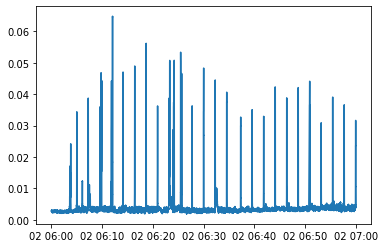

In [39]:
plt.plot(test_ld['timestamp'], test_ld['acc'])

In [0]:
board=scipy.signal.find_peaks(test_ld.acc, height=(0.01), distance=timethresh*72, width=1)

In [0]:
differ=np.diff(board[0])
differ=differ.tolist()
for x in board[0]:
    test_ld.at[x, 'state'] = 1

In [0]:
ld_boards=test_ld[test_ld['state']==1]

In [43]:
print(ld_boards.shape[0])

34


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'Board Detections')

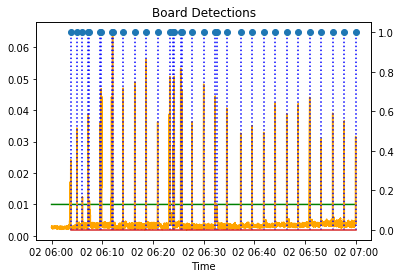

In [44]:
fig, ax1 = plt.subplots()
# https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html

# ax1.plot(test_ld['timestamp'], test_ld['acc_raw'], 'green')
ax1.plot(test_ld['timestamp'], np.ones(test_ld.shape[0])*0.01, 'green')
ax1.plot(test_ld['timestamp'], test_ld['acc'], 'orange')

# ax1.plot(test_ld['timestamp'], np.ones(test_ld.shape[0]*0.01), 'green')
# ax1.xaxis.set_major_locator(mdates.DateFormatter('%H:%M'))

ax1.set_xlabel('Time')

ax2 = ax1.twinx()
# creates another y plot keeping the x axis the same as before
ax2.stem(ld_boards['timestamp'], ld_boards['state'], 'b:')


plt.title('Board Detections')

In [0]:
loading_delays_rawdf=pd.DataFrame({"sample_number":board[0], "working_time":board[1]['widths']/72})
LD_events=pd.DataFrame({"timestamp":test_ld.iloc[loading_delays_rawdf.sample_number].timestamp, "event":1, "working_time":(loading_delays_rawdf.working_time).tolist()})
LD_events.index=LD_events.timestamp
LD_events.drop('timestamp', axis=1, inplace=True)
LD_events['energy']=float('nan')

Text(0.5, 1.0, 'Loader Loading Times Histogram')

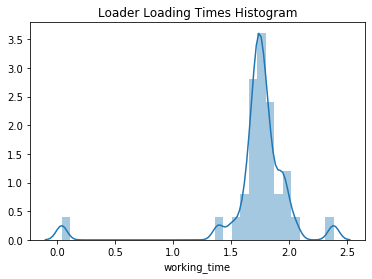

In [46]:
sns.distplot(LD_events.working_time)
plt.title('Loader Loading Times Histogram')

In [47]:
print('LD loading time mode: ', LD_events.working_time.mode().mean())

LD loading time mode:  1.7293700240069396


**Exercise:**

1. In the above script changing values of timethresh, height, width, distance etc will result in wrong detection of states ie false positives and false negatives. 
Taking the paramerters given in the above algo as the reference values see how the boards detected change with the changing parameters. Also see how the working time is affected as a result of changing parameters
2. Suggest ways to improve the algorithm.

### 2: Screen printer
***
![Screen%20Printer%20event%20detection.png](https://raw.githubusercontent.com/FaisalUllahKhan/IIOT/master/EM%20images/Screen%20Printer%20event%20detection.png)
***
![SP%20printing%20time.png](https://raw.githubusercontent.com/FaisalUllahKhan/IIOT/master/EM%20images/SP%20printing%20time.png)
***
![SP2.png](https://raw.githubusercontent.com/FaisalUllahKhan/IIOT/master/EM%20images/SP2.png)
***
It is found that the screen printer undergoes two events:
1. Printing: When the screen printer applies solder paste on the PCBs and
2. Cleaning: When the screen printer vacuum cleans the stencil

Hence the parameters that were calculated for the screen printer were the number of boards (throughput), printing time, cleaning time, energy consumed during printing, energy consumed during cleaning and number of boards printed per cleaning event.
For printing events, from the raw current data (orange waveform), a centered rolling sum with a window size of 6 samples (6 seconds, since current data is sampled every second) was applied to the signal. This processed signal can be seen in the figure above and is shown in blue. The window size of 6 seconds was selected because on observation from the raw data, it was found that a printing event in most cases took approximately 8 seconds. Taking a larger window close to 8, would increase the error as the rolling sum function starts rising earlier due to the inclusion of more data points. A window of 6 seconds included the right number of samples to get a large enough peak compared to the data points when the screen printer was idle, on which a height threshold between 11 and 15 was applied. A distance threshold of 12 seconds was applied to the find peaks function to ensure that any other peaks in the vicinity of the spikes in current during board processing were not incorrectly identified as boards. As can be seen in figure (), the blue signal includes at least 2 peaks in the processing part, but with the distance threshold and find peaks function, only the largest peak was identified as a printing event.
For cleaning events, a centered rolling sum with a window size of 12 samples (12 seconds) was applied to the signal. This window was selected, as on observation from the raw data, a cleaning event took approximately 12 seconds.
The working times were calculated using the widths of the peaks at the chosen threshold. The threshold was picked strategically, so that it captures the entire printing and cleaning time. As can be seen in the figures, the threshold on the processed signal captures all the spikes in current data, which was then attributed to a printing or cleaning event.
***
*Algo developed is shown below*

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [49]:
link = 'https://drive.google.com/open?id=1hOPPRv7KL20g-iHlyiX42QyRVeGoj9-I'
fluff, id = link.split('=')
print (id)
 # Verify that you have everything after '='

1hOPPRv7KL20g-iHlyiX42QyRVeGoj9-I


Using matplotlib backend: agg


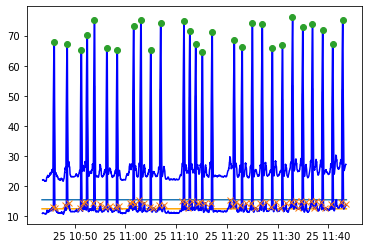

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np
import seaborn as sns
# plt.rcParams["figure.figsize"]=[15,5]
import io

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('screenprinter.csv')  
raw_sp= pd.read_csv('screenprinter.csv', usecols =['timestamp', 'data.A1'])
raw_sp.dropna(axis=0, inplace=True)
raw_sp.sort_values(by=['timestamp'])
raw_sp.reset_index(inplace=True)
raw_sp['timestamp'] =  pd.to_datetime(raw_sp['timestamp'])
raw_sp

test_sp=raw_sp
test_sp[100:120]

test_sp=test_sp[['data.A1','timestamp']]
test_sp

test_sp['sum']=pd.Series.to_frame(test_sp['data.A1'].rolling(6, center=True).sum())
test_sp['sum_mean']=test_sp['sum'].rolling(12,center=True).mean()
test_sp['sum_forcleaning']=pd.Series.to_frame(test_sp['data.A1'].rolling(12, center=True).sum())
test_sp.reset_index(inplace=True) ##
test_sp[90:110]

%matplotlib 

test_sp['threash'] = 12.5
test_sp['threash_up'] = 15.5

test_sp['idle']=2
sptimethresh=20
printing_delays_raw, dict1 =scipy.signal.find_peaks(test_sp['sum'],height=(12.5, 15.5),distance=sptimethresh, width=1)

printing_delays_raw
# these will give us just the printing events
dict1

new_df = pd.DataFrame(test_sp.timestamp[printing_delays_raw])
new_df['StateSum'] = test_sp['sum']
new_df['WorkingTime'] = dict1['widths']
new_df = new_df.reset_index()
del new_df['index']

plt.plot(test_sp['timestamp'], test_sp['threash_up'])
plt.plot(test_sp['timestamp'], test_sp['threash'], 'orange')
plt.plot(test_sp['timestamp'], test_sp['sum'], 'blue')
plt.plot(new_df['timestamp'], new_df['StateSum'], 'x')

sptimethresh=20
printing_cleaning_raw, dict2 =scipy.signal.find_peaks(test_sp['sum'],height=(17),distance=sptimethresh, width=1)
printing_cleaning_raw

new_df2 = pd.DataFrame(test_sp.timestamp[printing_cleaning_raw])
new_df2['StateSum'] = test_sp['sum_forcleaning']
new_df2['WorkingTime'] = dict2['widths']
new_df2 = new_df2.reset_index()
del new_df2['index']

plt.plot(test_sp['timestamp'], test_sp['sum_forcleaning'], 'blue')
plt.plot(new_df2['timestamp'], new_df2['StateSum'], 'o')

**Exercise:**

1. In the above script changing values of sptimethresh, height, width etc will result in wrong detection of states ie false positives and false negatives. 
Taking the paramerters given in the above algo as the reference values see how the boards detected change with the changing parameters.
2. Suggest ways to improve the algorithm